In [1]:
#This is a hack to make the %%cpp work inside mybinder.org - ignore
from ROOT import TObject

Welcome to JupyROOT 6.22/02


In [2]:
%%cpp
//We specify that we are writing C++, rather than python, with the above %%cpp
//Create a histogram with 100 bins and a range from -10 to 10 with name "h" and titile "My First Histogam"
TH1F hist("h","My First Histogram;x {0}; frequency",100,10,10);
//Fill it with 2000 numbers drawn from a Gaussian shape.j
hist.FillRandom("gaus",2000);

Info in <TH1F::FillRandom>: Using function axis and range [-1,1]


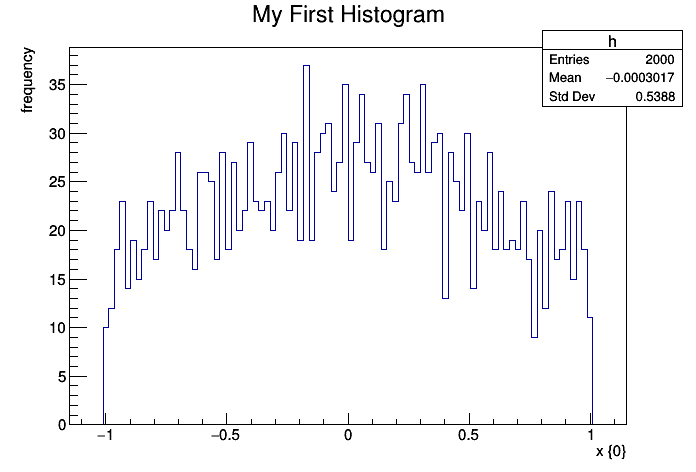

In [3]:
%%cpp
//Note when using ROOT from a linux terminal, it turns out you can skip the two lines about the TCanvas - 
//this happens automaticlaly behind the scenes
TCanvas can;
hist.Draw();
can.Draw();

Info in <TH1F::FillRandom>: Using function axis and range [-1,1]


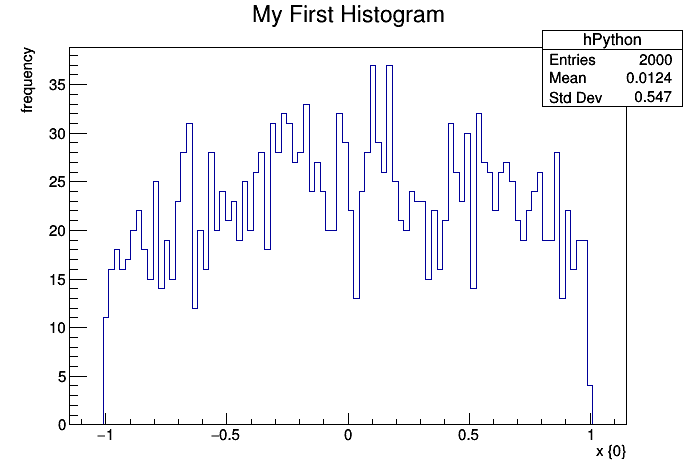

In [4]:
#Now lets try the same in python
#In the python case we have to explicitly ask to import the classes (TH1F, TCanvas) that we will use.
#We did not have to anything equivalent in the C++ example above, executed in CLING. 
from ROOT import TH1F, TCanvas
histPython = TH1F("hPython","My First Histogram;x {0}; frequency",100,10,10)
histPython.FillRandom("gaus",2000);
canPython = TCanvas()
histPython.Draw()
canPython.Draw()

In [5]:
#Task 1 - fill a histogram with a landau function and draw it. Use either C++ or python.

In [6]:
%%cpp
//Now lets look at unbinned data and graphs
//define arrays of floats x and y
float x[10];
float y[10];
//fill the arrays up with some data
for (int i = 0; i < 10; ++i) {x[i]=i+1;y[i]=x[i]*x[i];}

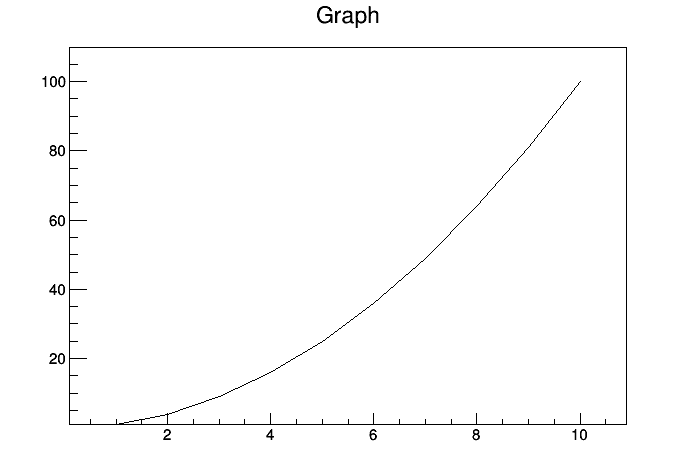

In [7]:
%%cpp
//Now create a TGraph using the above data
TGraph myGraph(10,x,y);
TCanvas canGraph;
canGraph.cd();
myGraph.Draw();
canGraph.Draw();

In [8]:
#Now lets do the same in python - note the way we fill arrays is very different to c++!
from ROOT import TGraph
n=10
from array import array
x=array('f')
y=array('f')
for counter in range(n):
    x.append(counter+1)
    y.append(x[counter]*x[counter])

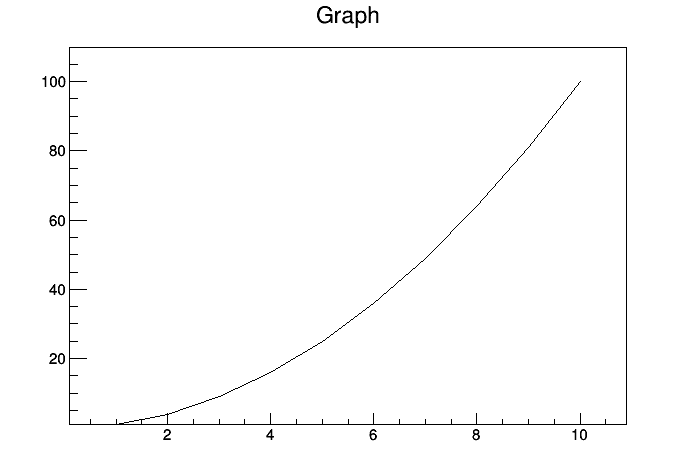

In [9]:
myGraph = TGraph(n,x,y)
#Note we cd into our canvas sued for python, and empty it with the Clear() function/
canPython.cd()
canPython.Clear()
myGraph.Draw()
canPython.Draw()

In [10]:
#Task2 - fit a function of type pol2 to the graph in python or c++

In [11]:
%%cpp
//Load the file tree2.root via the TFile object
TFile f("tree2.root");
//print the contents of the file
f.ls();
//Note we can't use the TBrowser shown in the lecture notes inside a Jupyter notebook
//But we can still print properties of the tree t2
t2->GetListOfBranches()->Print();

TFile**		tree2.root	
 TFile*		tree2.root	
  KEY: TTree	t2;1	a Tree with data from a fake Geant3
Collection name='TObjArray', class='TObjArray', size=16
 *Br    0 :vect      : vect[7]/F                                              *
*Entries :    10000 : Total  Size=     281108 bytes  File Size  =     232990 *
*Baskets :        9 : Basket Size=      32000 bytes  Compression=   1.20     *
*............................................................................*
 *Br    1 :getot     : getot/F                                                *
*Entries :    10000 : Total  Size=      40625 bytes  File Size  =      31154 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   1.29     *
*............................................................................*
 *Br    2 :gekin     : gekin/F                                                *
*Entries :    10000 : Total  Size=      40625 bytes  File Size  =      35912 *
*Baskets :        2 : Basket Size=      32000 bytes  Co

In [12]:
#The same thing in python
from ROOT import TFile
myFile = TFile("tree2.root")
t2 = myFile.Get("t2;1")
t2.GetListOfBranches().Print()

Collection name='TObjArray', class='TObjArray', size=16
 *Br    7 :vect      : vect[7]/F                                              *
*Entries :    10000 : Total  Size=     281108 bytes  File Size  =     232990 *
*Baskets :        9 : Basket Size=      32000 bytes  Compression=   1.20     *
*............................................................................*
 *Br    8 :getot     : getot/F                                                *
*Entries :    10000 : Total  Size=      40625 bytes  File Size  =      31154 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   1.29     *
*............................................................................*
 *Br    9 :gekin     : gekin/F                                                *
*Entries :    10000 : Total  Size=      40625 bytes  File Size  =      35912 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   1.12     *
*.......................................................................

In [13]:
#Task 3
#Draw the 3D plot of vect components with and without cuts applied, as shown in the lecture notes.
#Try out other choices of cuts, first scanning the variable you want to cut on in order to see possible values.

In [15]:
%%cpp
t2->Draw("destep>>hDEStep","destep");
h2 = static_cast<TH1F*>(gDirectory->Get("hDEStep"));
h2->GetMean()

(double) 2.0035940e-05


Warning in <TH1F::Add>: Attempt to add histograms with different axis limits


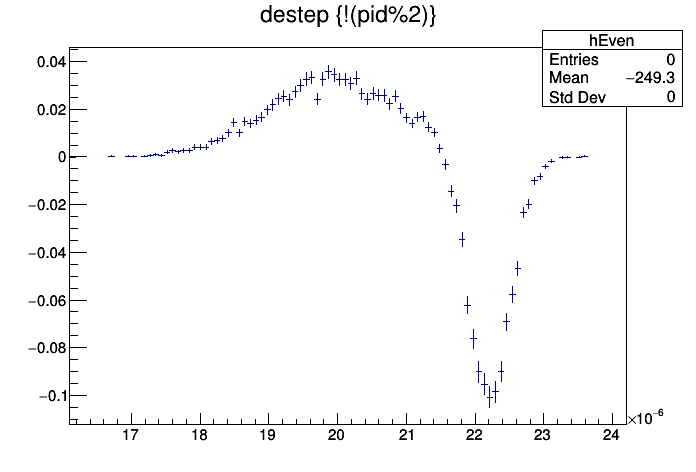

In [24]:
%%cpp
//Create an odd and even histogram for events with odd or even values of the pid variable
t2->Draw("destep>>hEven","!(pid%2)");
hEven = static_cast<TH1F*>(gDirectory->Get("hEven"));
t2->Draw("destep>>hOdd","(pid%2)");
hOdd = static_cast<TH1F*>(gDirectory->Get("hOdd"));
//Scale both histograms to unity via a factor of 1 divided by their areas
hEven->Scale(1./hEven->Integral());
hOdd->Scale(1./hOdd->Integral());
//Make a copy of the event histogram
TH1F hDiff(*hEven);
//And then add the odd histogram to that with a weight of -1
hDiff.Add(hOdd,-1);
can.cd();
can.Clear();
hDiff.Draw();
can.Draw();

In [28]:
#The same in python
t2.Draw("destep>>hEven_TH1F","!(pid%2)")
from ROOT import gDirectory
gDirectory().ls()
hEven_TH1F.Scale(1./hEven_TH1F.Integral())

TypeError: 'TDirectory' object is not callable